## Option 1: Computational Approach

Try coding up your own simulation of a two-player iterated Prisoner’s Dilemma. Feel free to
use Python or R — whichever you prefer. This question is open-ended, but your work should
contain some of the following elements:

- Try a few strategies that we learned against each other. Some examples you might consider
include: tit-for-tat, grim trigger, intermediate punishment strategies, always cooperate,
always defect, probabilistic strategies.
- Produce some informative plots or summary statistics about the outcomes of your simulation. (You can draw on the plots from papers we’ve read for inspiration.) Some information
you might convey includes: which strategies get the highest total payoffs (against which?)?
When can cooperation be sustained?
- Be sure to reproduce your payoff matrix and all other key decisions you made in your
write-up. Think carefully about the number of repetitions of the game you want to do,
and why.
- If you’d rather experiment with an existing approach rather than writing your own code, feel
free to play around with the axelrod Python library: https://github.com/Axelrod-Python/
Axelrod. This has built-in tools to create head-to-head matches, tournaments over multiple
strategies, and visualizations.

Optional extensions:
- Incorporate discounting of future utilities
- Incorporate some sort of learning or adaptation (for instance, if you want to play around
with reinforcement learning, see: https://github.com/Axelrod-Python/axelrod-dojo)
Briefly discuss your results.

In [49]:
#Try using Axelrod
import axelrod as axl

#Check for player types
players_list = axl.strategies
print(len(players_list), "players available")

#Example
players_ex = [axl.Cooperator(), axl.Alternator()]

match = axl.Match(players = players_ex, turns=10)

match.play()
print(match.sparklines())


243 players available
██████████
█ █ █ █ █ 


In [3]:
#Code to get match results

match.scores()

match.final_score()

match.final_score_per_turn()

match.winner()

match.cooperation()  # The count of cooperations

match.normalised_cooperation()  # The count of cooperations per turn


(1.0, 0.5)

Strategies covered in class to test:

- Grim trigger
- Tit-for-Tat
- Intermediate punishment strategies
    - Similar to grim trigger: k-Grim Trigger
        - Cooperate until your opponent defects. If
    your opponent defects, do not cooperate for the next k periods but
    then return to cooperation; if you defect, do not cooperate for the
    next k periods but then return to cooperation. Once you have
    returned to cooperation, cooperate until a defection occurs.
    - Similar to tit-for-tat: 
        - Cooperate until your opponent defects. If your
    opponent defects, do not cooperate for k periods. If she cooperates
    in any of the k periods, return to cooperation, ending the
    punishment phase. If she fails to cooperate in any period of the
    punishment phase, then the punishment phase starts over i.e. don’t
    cooperate for k more periods. If your own failure to cooperate
    caused the punishment phase then cooperate during the punishment
    phase.
- Always cooperate
- Always defect
- Probabilistic stragies (ie. 0.7 chance of cooperation)



Things to vary:

- Finite vs infinite games


For finite games:

If the stage game G has a unique Nash equilibrium then, for any
finite T , the repeated game G (T ) has a unique subgame-perfect
outcome: the Nash equilibrium of G is played in every stage.


For infinite games:

In the infinitely repeated game G (∞,δ), each subgame beginning
at stage t + 1 is identical to the original game G (∞,δ). As in
the finite-horizon case, there are as many subgames beginning at
stage t + 1 of G (∞,δ) as there are possible histories of play
through stage t.

A Nash equilibrium is subgame-perfect if the players’ strategies
constitute a Nash equilibrium in every subgame.

- simulate by using δ discount factor - and a repeated game that ends after a random number of repitions. 

Consider also:
- discount rates -> for infinitely repeated games
- The Folk Theorem:
    - For every feasible and individually rational payoﬀ vector v there is
a vector of discount rates δ0 (i.e. one δ0 for each player) such
i
that the payoﬀ vector v occurs in a Nash equilibrium of the
repeated game if δi ≥ δ0 for all i.


Example visualisation: https://www.nature.com/articles/s41562-025-02172-y/figures/3

We start by considering a simulation of a one-off Prisoner's Dilemma game:

In [22]:
#Single round Prisoner's Dilemma

import itertools

# Define actions
ACTIONS = ["C", "D"]

# Payoff matrix as a dictionary
# (A_action, B_action): (A_payoff, B_payoff)
PAYOFFS = {
    ("C", "C"): (3, 3),
    ("C", "D"): (0, 5),
    ("D", "C"): (5, 0),
    ("D", "D"): (1, 1),
}

def best_response_to(opponent_action, player="A"):
    """Return the best action (C or D) against the opponent's action."""
    if player == "A":
        payoffs = {a: PAYOFFS[(a, opponent_action)][0] for a in ACTIONS}
    else:
        payoffs = {a: PAYOFFS[(opponent_action, a)][1] for a in ACTIONS}
    best = max(payoffs, key=payoffs.get)
    return [a for a, p in payoffs.items() if p == payoffs[best]]  # handle ties

# Find Nash equilibria
nash_equilibria = []
for a_action, b_action in itertools.product(ACTIONS, repeat=2):
    a_best = best_response_to(b_action, player="A")
    b_best = best_response_to(a_action, player="B")
    if a_action in a_best and b_action in b_best:
        nash_equilibria.append((a_action, b_action))

print("Nash Equilibria:", nash_equilibria)


Nash Equilibria: [('D', 'D')]


We can see that the Nash Equilibrium is Defect/Defect for Player A and B. This demonstrates the nature of one-off Prisoner Dilemma games, where rational actors will choose the strategy that maximises their payoff according to their best response. As the game does not continue, there are no incentives for future punishments or payoffs. However, this is not the case for iterative versions of the game. 

Iterative versions of the Prisoner's Dilemma can be either finite or infinite games. 

For finite games, the following applies for the Nash Equilibrium:

If the stage game $G$ has a unique Nash equilibrium then, for any finite $T$, the repeated game $G(T)$ has a unique subgame-perfect outcome: the Nash equilibrium of G is played in every stage. This works via backward induction - in the last round, as there is no incentive for future payoffs, both players will choose the best response that maximises their payoff. Given that they know this will be their strategy in the last round, they therefore also know that their strategy in the second-last round can't influence the results of the last round. This logic continues backward for each round.

In [ ]:
#Finite Repeated Prisoner's Dilemma (Rational Actors)

import numpy as np

def play_stage(a_action, b_action):
    """Return payoffs for one stage."""
    return PAYOFFS[(a_action, b_action)]

def finite_repeated_pd(T):
    """
    Simulate a finite repeated Prisoner's Dilemma with T rounds.
    Both players play the stage-game Nash equilibrium: Defect every time.
    """
    actions_A, actions_B = [], []
    payoffs_A, payoffs_B = [], []
    
    for t in range(1, T + 1):
        a_action, b_action = "D", "D"  # Nash equilibrium each stage
        actions_A.append(a_action)
        actions_B.append(b_action)
        a_pay, b_pay = play_stage(a_action, b_action)
        payoffs_A.append(a_pay)
        payoffs_B.append(b_pay)
    
    total_A, total_B = sum(payoffs_A), sum(payoffs_B)
    avg_A, avg_B = np.mean(payoffs_A), np.mean(payoffs_B)
    
    print(f"\n--- Finite Repeated PD with {T} Rounds ---")
    print(f"Stage actions: (A,B) = (D,D) every round")
    print(f"Total Payoffs: A = {total_A}, B = {total_B}")
    print(f"Average per round: A = {avg_A:.2f}, B = {avg_B:.2f}")
    print("----------------------------------------")

# Run for 10 and 100 rounds
finite_repeated_pd(10)
finite_repeated_pd(100)
finite_repeated_pd(1000)


--- Finite Repeated PD with 10 Rounds ---
Stage actions: (A,B) = (D,D) every round
Total Payoffs: A = 10, B = 10
Average per round: A = 1.00, B = 1.00
----------------------------------------

--- Finite Repeated PD with 100 Rounds ---
Stage actions: (A,B) = (D,D) every round
Total Payoffs: A = 100, B = 100
Average per round: A = 1.00, B = 1.00
----------------------------------------

--- Finite Repeated PD with 1000 Rounds ---
Stage actions: (A,B) = (D,D) every round
Total Payoffs: A = 1000, B = 1000
Average per round: A = 1.00, B = 1.00
----------------------------------------


This simulation shows that the strategy for each round of the finite repeated game is again Defect/Defect for both Player A and Player B, as this is the Nash Equilibrium of the stage game G. It also illustrates that this outcome holds regardless of the number of rounds in the finite game: as long as there is a known final stage, players have no incentive to cooperate, and the logic of backward induction ensures that the stage-game Nash equilibrium is played in every round.

We can therefore conclude that to achieve a Nash Equilibrium in repeated finite games, where players know when the final round will be, players should choose an always Defect strategy. 

However, this is not the case for infinite games, or for indefinitely repeated games (games where there are a finite amount of rounds, but players do not know which round will be the final one).

In the infinitely repeated game $G (∞,δ)$, each subgame beginning at stage $t + 1$ is identical to the original game $G (∞,δ)$. As in the finite-horizon case, there are as many subgames beginning at
stage $t + 1$ of $G (∞,δ)$ as there are possible histories of play through stage $t$.

A Nash equilibrium is subgame-perfect if the players’ strategies constitute a Nash equilibrium in every subgame.

This means that there are a number of different strategies that could be employed to maximise a player's payoffs, and the success of these will in part depend on the strategy of their opponent. 

Here we use the axelrod library to test a number of these different strategies, to explore how different strategies result in different payoffs against each other, and which strategies can lead to cooperation. 

The following 8 strategies will be tested:

- Cooperator
- Defector
- TitfotTat 
- Grudger
    Grim Trigger 
- Grumpy
    - A player that gets grumpier the more the opposition defects, and nicer the more they cooperate. Starts off Nice, but becomes grumpy once the grumpiness threshold is hit. Won’t become nice once that grumpy threshold is hit, but must reach a much lower threshold before it becomes nice again.
- Limited Retaliate
    - A player that co-operates unless the opponent defects and wins. It will then retaliate by defecting. It stops when either, it has beaten the opponent 10 times more often that it has lost or it reaches the retaliation limit (20 defections). If the opponent has played D to my C more often than x% of the time that I’ve done the same to him, retaliate by playing D but stop doing so once I’ve hit the retaliation limit.
- Average Copier
    - The player will cooperate with probability p if the opponent’s cooperation ratio is p. Starts with random decision. 
- WorseAndWorse3
    - Cooperates in the first turn. Then defects with probability no. of opponent defects / (current turn - 1). Therefore it is more likely to defect when the opponent defects for a larger proportion of the turns.

In [65]:
# Axelrod Tournament:

# Define the 10 strategies
players = [
    axl.Cooperator(),            # Always cooperate
    axl.Defector(),              # Always defect
    axl.TitForTat(),             # Cooperate, then mimic opponent
    axl.Grudger(),               # Cooperate until opponent defects once, then always defect
    axl.Grumpy(),                # Gets grumpy after repeated defections
    axl.LimitedRetaliate(),      # Punish opponent for 5 rounds after defection
    axl.AverageCopier(),         # Cooperate with probability equal to opponent’s cooperation rate
    axl.WorseAndWorse3(),        # Becomes increasingly likely to defect as opponent defects
    axl.Random(),                # Cooperate or defect randomly
]

tournament_10 = axl.Tournament(players, turns=10, repetitions=10, seed=42)
results_10 = tournament.play()

summary_10 = results_10.summarise()
rank, name, mean_score, *rest = summary_10[0]
print(f"Dominant strategy: {name} (Mean score: {mean_score:.3f})")

tournament_100 = axl.Tournament(players, turns=100, repetitions=10, seed=42)
results_100 = tournament.play()

summary_100 = results_100.summarise()
rank, name, mean_score, *rest = summary_100[0]
print(f"Dominant strategy: {name} (Mean score: {mean_score:.3f})")

tournament_500 = axl.Tournament(players, turns=500, repetitions=10, seed=42)
results_500 = tournament.play()

summary_500 = results_500.summarise()
rank, name, mean_score, *rest = summary_500[0]
print(f"Dominant strategy: {name} (Mean score: {mean_score:.3f})")

Analysing: 100%|██████████| 25/25 [00:00<00:00, 296.90it/s]


Dominant strategy: Limited Retaliate: 0.1, 20 (Mean score: 2.717)


Analysing: 100%|██████████| 25/25 [00:00<00:00, 300.63it/s]


Dominant strategy: Grudger (Mean score: 2.732)


Analysing: 100%|██████████| 25/25 [00:00<00:00, 307.82it/s]

Dominant strategy: Grudger (Mean score: 2.740)


/var/folders/fk/jrs5sj2165v98_klcg800pk40000gn/T/ipykernel_45727/346793551.py:11: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  p_10.show()
/var/folders/fk/jrs5sj2165v98_klcg800pk40000gn/T/ipykernel_45727/346793551.py:20: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  p_100.show()
/var/folders/fk/jrs5sj2165v98_klcg800pk40000gn/T/ipykernel_45727/346793551.py:29: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  p_500.show()


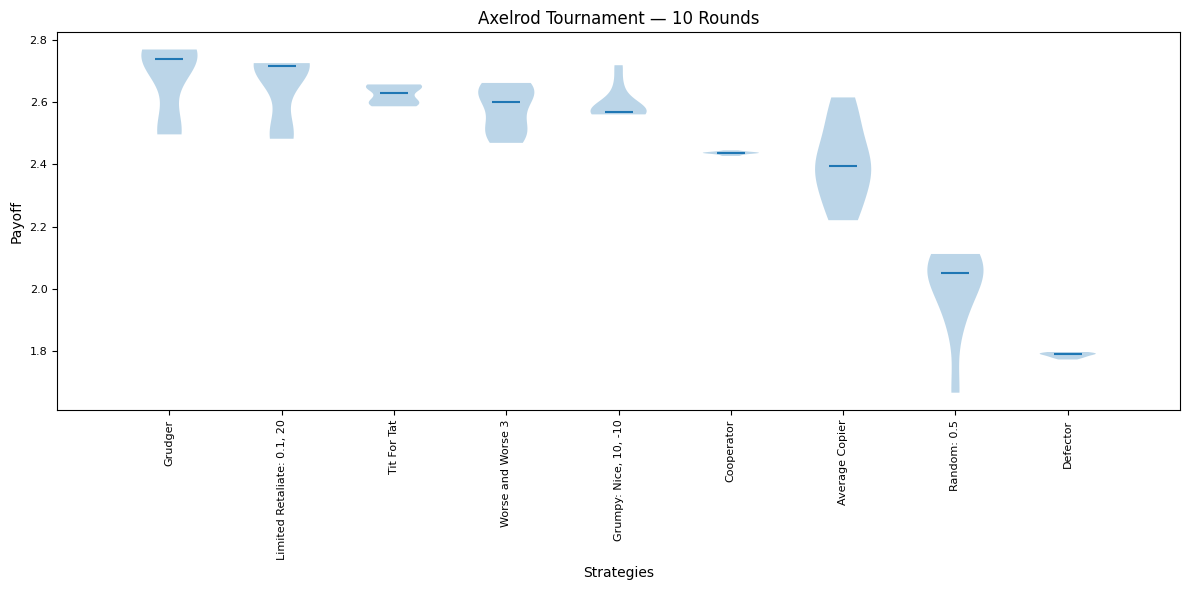

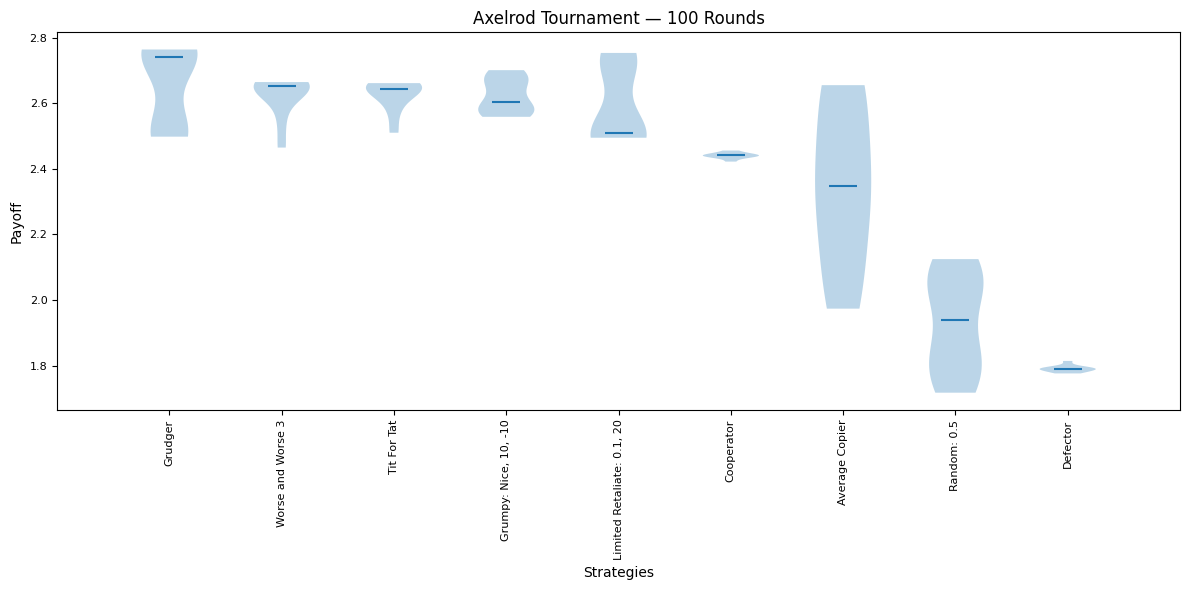

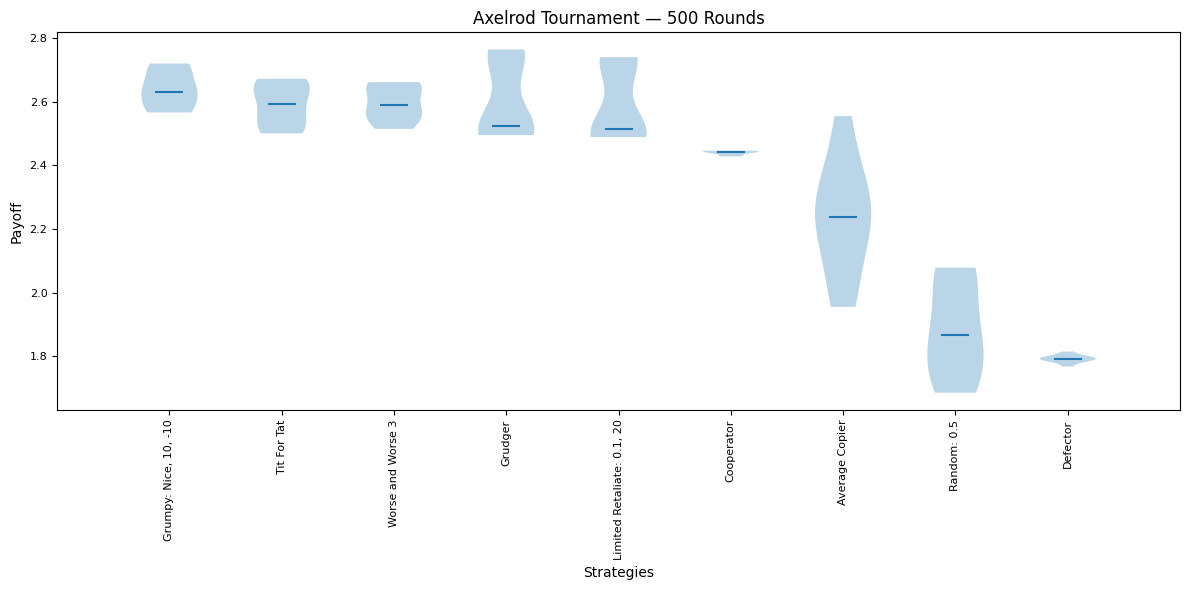

In [ ]:
#Plot Results

import matplotlib.pyplot as plt
import axelrod as axl

# --- 10 Rounds ---
plot_10 = axl.Plot(results_10)
_, ax = plt.subplots()
title = ax.set_title("Axelrod Tournament — 10 Rounds")
xlabel = ax.set_xlabel("Strategies")
ylabel = ax.set_ylabel("Average Payoff")
p_10 = plot_10.boxplot(ax=ax)
p_10.show()

# --- 100 Rounds ---
plot_100 = axl.Plot(results_100)
_, ax = plt.subplots()
title = ax.set_title("Axelrod Tournament — 100 Rounds")
xlabel = ax.set_xlabel("Strategies")
ylabel = ax.set_ylabel("Average Payoff")
p_100 = plot_100.boxplot(ax=ax)
p_100.show()

# --- 500 Rounds ---
plot_500 = axl.Plot(results_500)
_, ax = plt.subplots()
title = ax.set_title("Axelrod Tournament — 500 Rounds")
xlabel = ax.set_xlabel("Strategies")
ylabel = ax.set_ylabel("Average Payoff")
p_500 = plot_500.boxplot(ax=ax)
p_500.show()

/var/folders/fk/jrs5sj2165v98_klcg800pk40000gn/T/ipykernel_45727/1472670868.py:10: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  p_10.show()
/var/folders/fk/jrs5sj2165v98_klcg800pk40000gn/T/ipykernel_45727/1472670868.py:19: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  p_100.show()
/var/folders/fk/jrs5sj2165v98_klcg800pk40000gn/T/ipykernel_45727/1472670868.py:28: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  p_500.show()


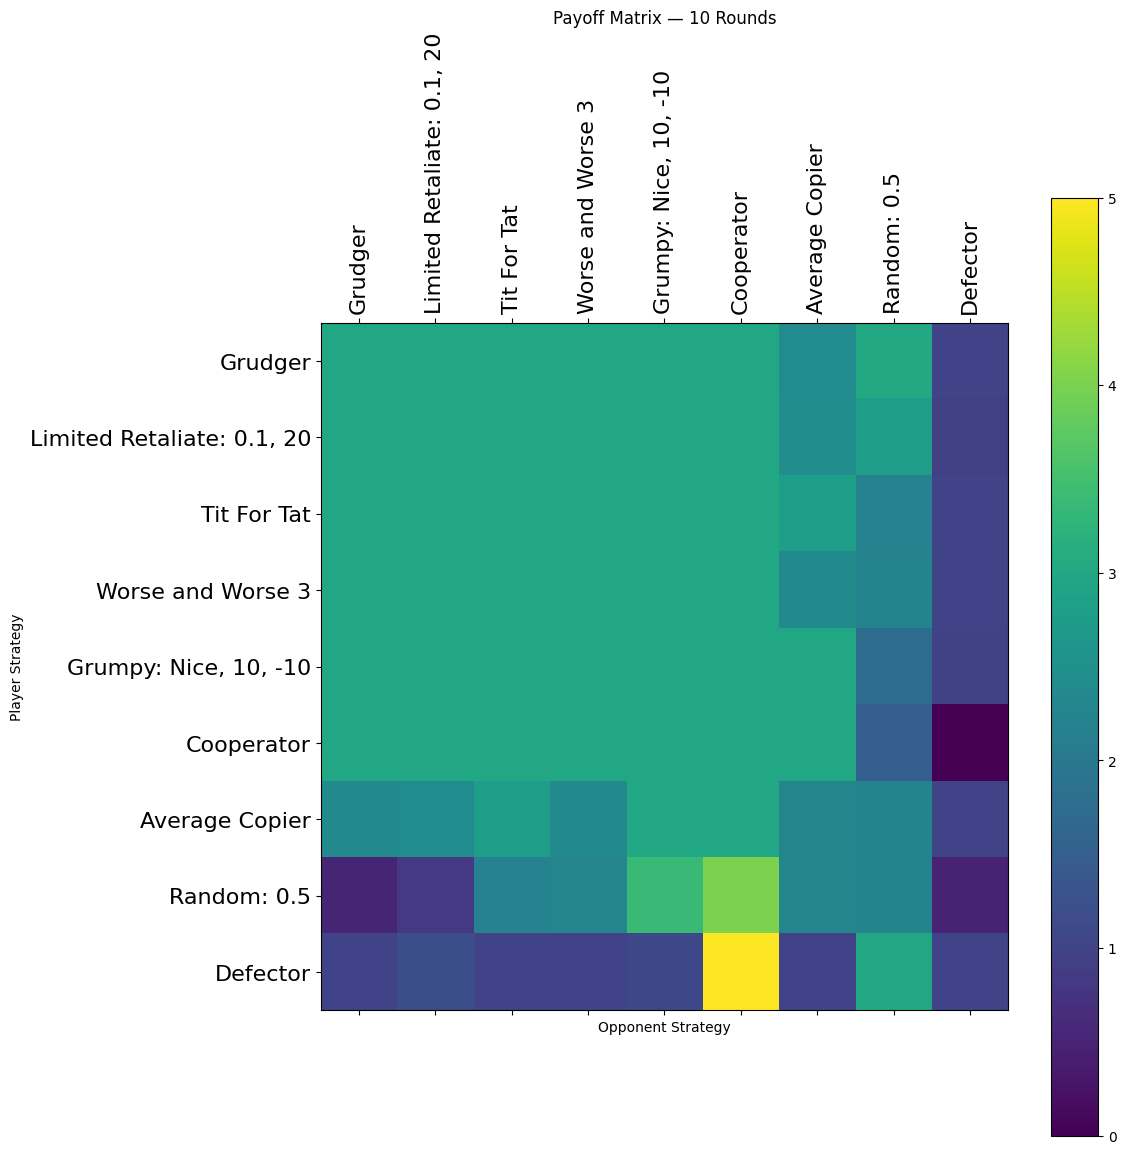

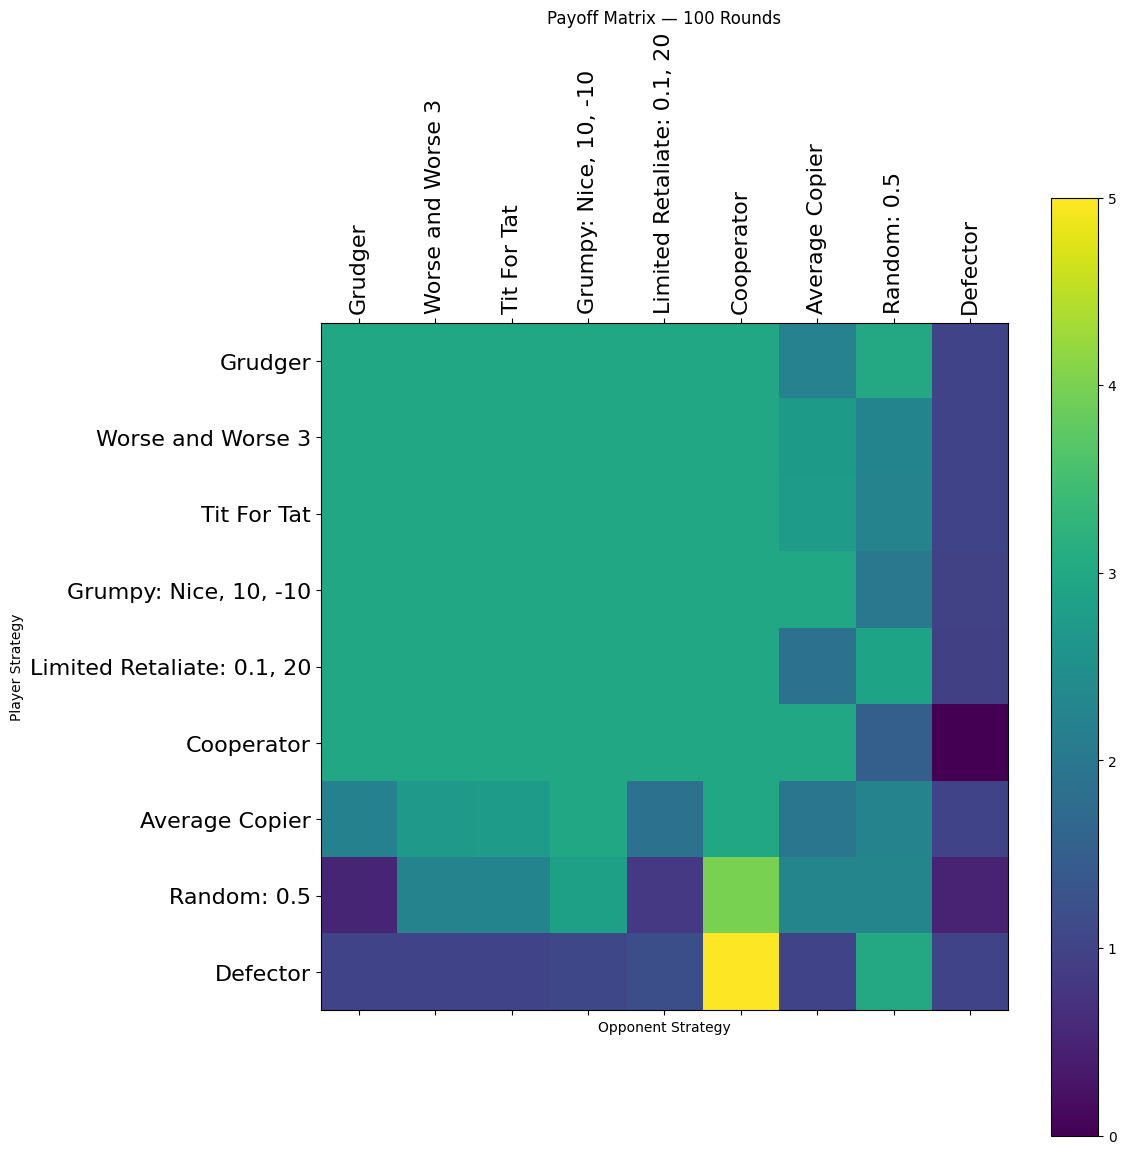

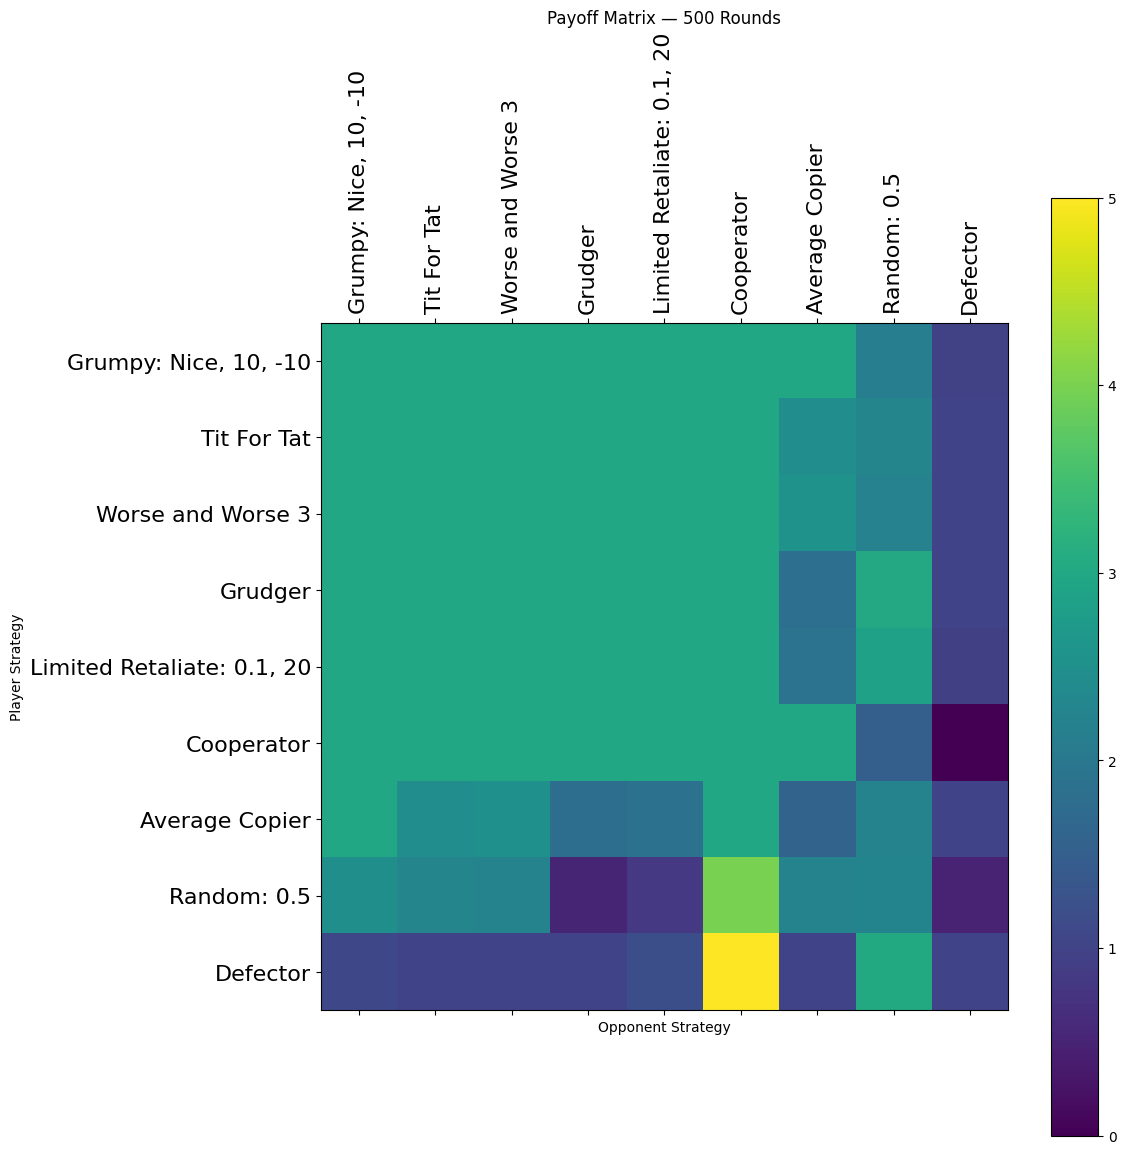

In [48]:
#Plot Payoff Matrix:

# --- 10 Rounds ---
plot_10 = axl.Plot(results_10)
_, ax = plt.subplots()
title = ax.set_title("Payoff Matrix — 10 Rounds")
xlabel = ax.set_xlabel("Opponent Strategy")
ylabel = ax.set_ylabel("Player Strategy")
p_10 = plot_10.payoff(ax=ax)
p_10.show()

# --- 100 Rounds ---
plot_100 = axl.Plot(results_100)
_, ax = plt.subplots()
title = ax.set_title("Payoff Matrix — 100 Rounds")
xlabel = ax.set_xlabel("Opponent Strategy")
ylabel = ax.set_ylabel("Player Strategy")
p_100 = plot_100.payoff(ax=ax)
p_100.show()

# --- 500 Rounds ---
plot_500 = axl.Plot(results_500)
_, ax = plt.subplots()
title = ax.set_title("Payoff Matrix — 500 Rounds")
xlabel = ax.set_xlabel("Opponent Strategy")
ylabel = ax.set_ylabel("Player Strategy")
p_500 = plot_500.payoff(ax=ax)
p_500.show()

Classic Prisoner's Dilemma

In [19]:
## Classic Prisoner's Dilemma

players = [
    axl.Cooperator(),
    axl.Defector(),
    axl.TitForTat(),
    axl.Random(),
]

tournament = axl.Tournament(players, turns=200, repetitions=5)
results = tournament.play()

Analysing: 100%|██████████| 25/25 [00:00<00:00, 83.01it/s]


Ranking of strategies:
['Defector', 'Random: 0.5', 'Tit For Tat', 'Cooperator']


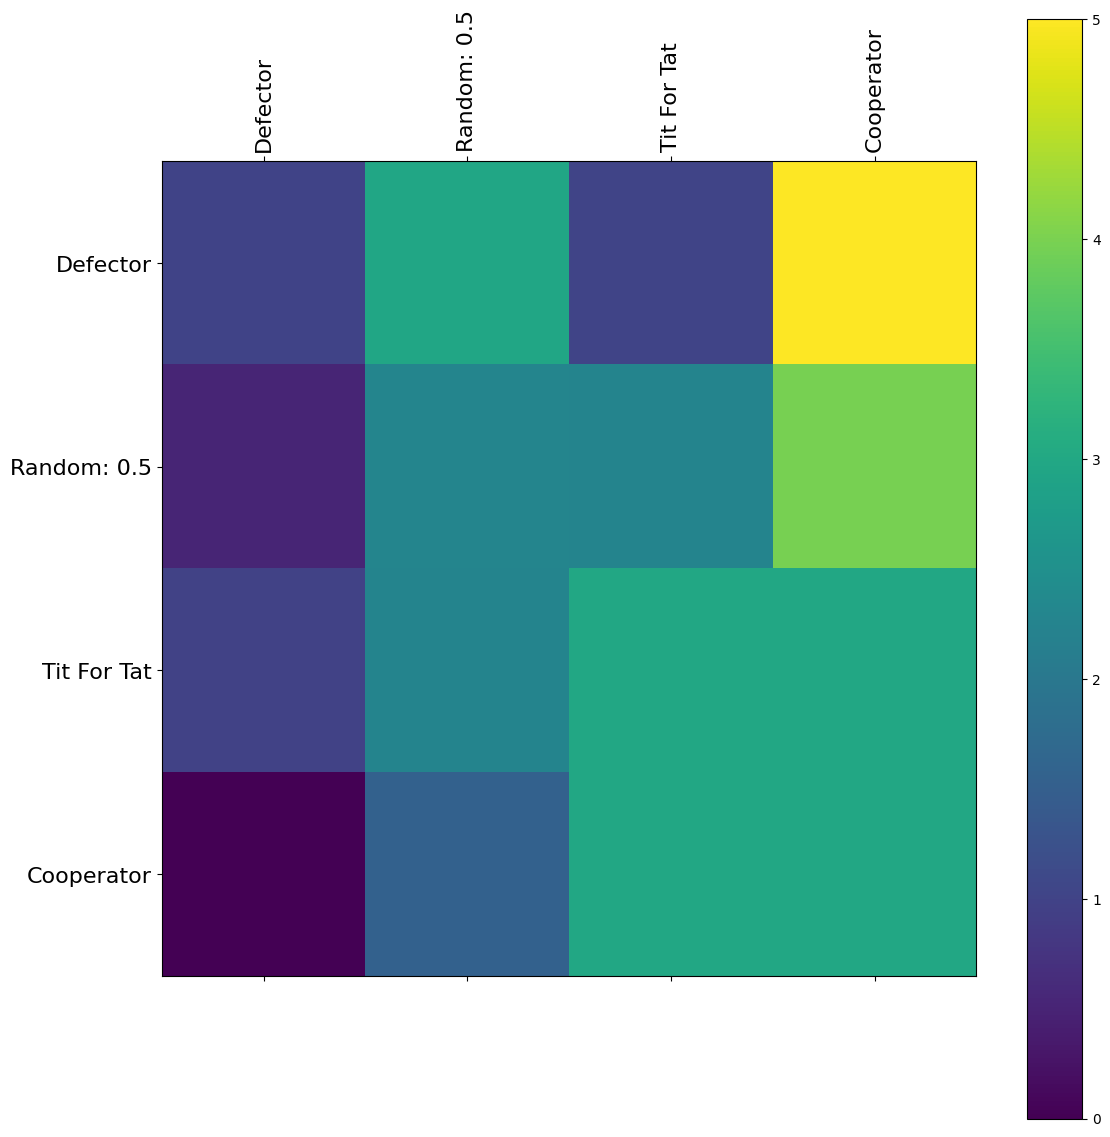

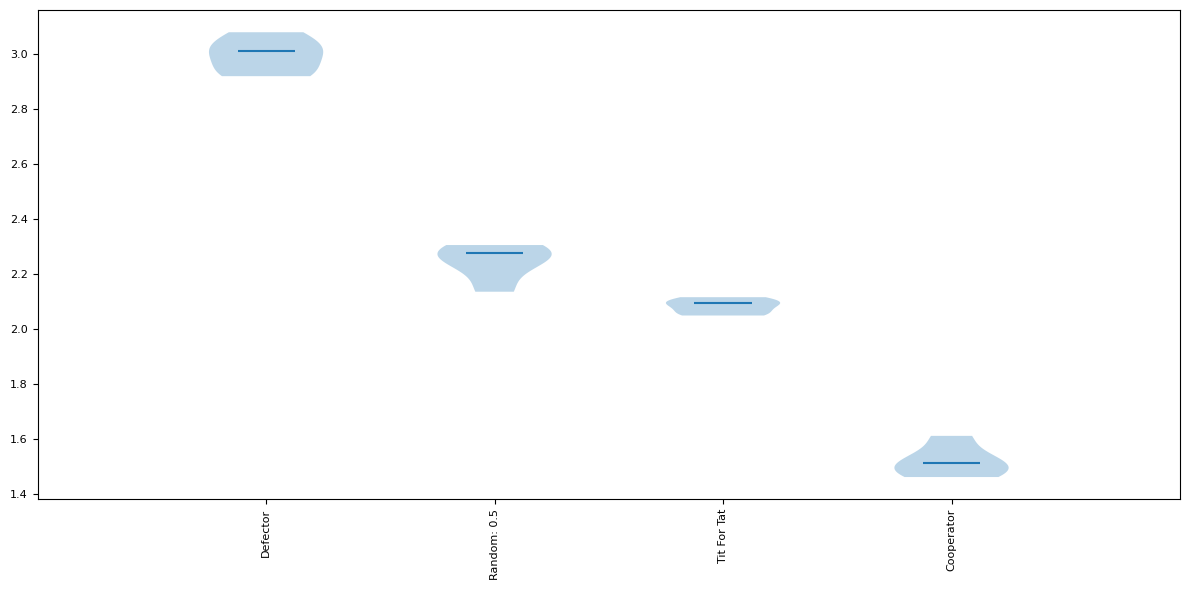

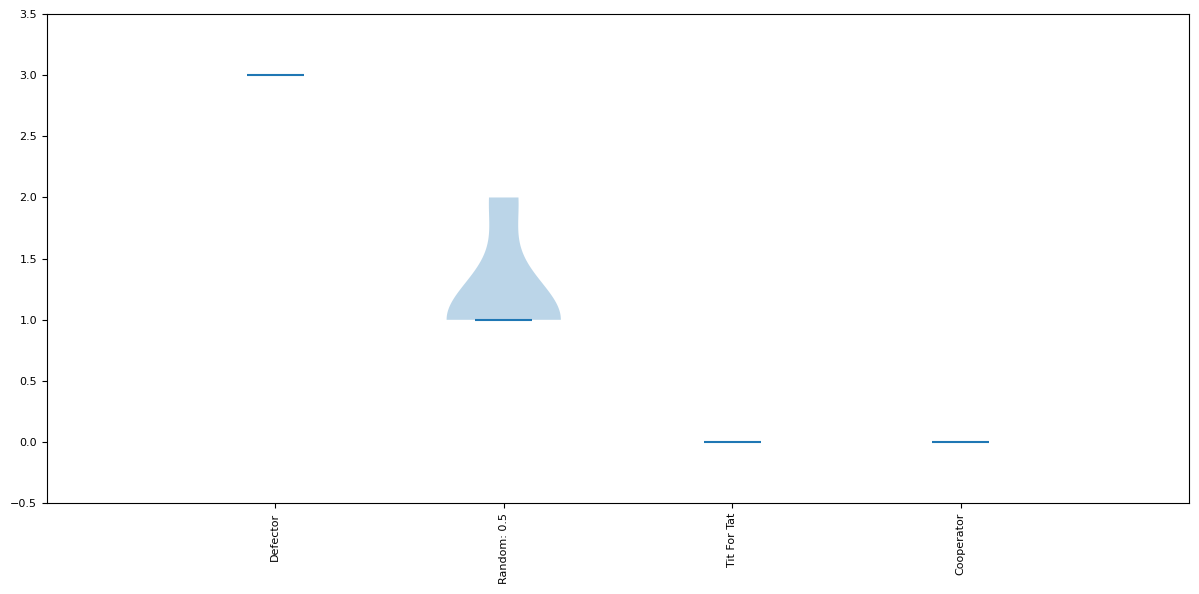

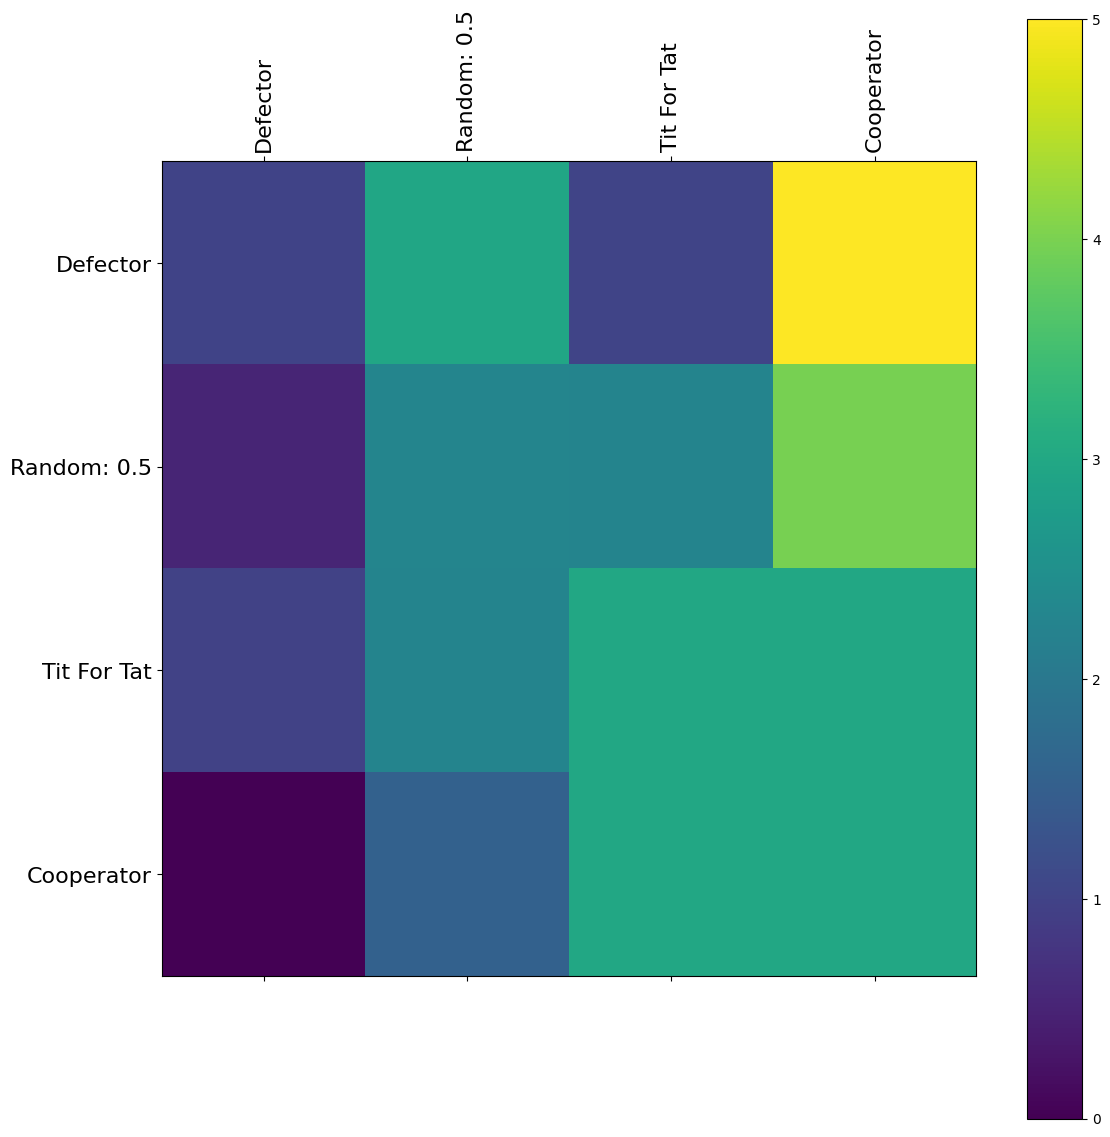

In [20]:
print("Ranking of strategies:")
print(results.ranked_names)

plot = axl.Plot(results)
plot.boxplot()
plot.winplot()
plot.payoff()

The game theory behind ['A House of Dynamite'](https://www.rottentomatoes.com/m/a_house_of_dynamite) from director Kathryn Bigelow - A Bayesian Signaling Game Setup

A single, unattributed intercontinental ballistic missile is launched toward the United States. In the span of 18 minutes, from the first detection of a launch to impact,___



In [1]:
# Parameters
p_prior = 0.3  # Prior that adversary is Aggressor
alpha, beta = 0.8, 0.3  # Signaling probabilities
payoffs = {
    ('A','R'): 5, ('A','W'): -10,
    ('I','R'): -20, ('I','W'): 0
}

def posterior(p, alpha, beta, signal):
    if signal == 's1':
        return (alpha*p) / (alpha*p + beta*(1-p))
    else:
        return ((1-alpha)*p) / ((1-alpha)*p + (1-beta)*(1-p))

def expected_us_payoff(p_post, action):
    # Expected payoff over true type given posterior
    EU = p_post*payoffs[('A',action)] + (1-p_post)*payoffs[('I',action)]
    return EU

# Receiver’s optimal response for each signal
for signal in ['s1','s2']:
    p_post = posterior(p_prior, alpha, beta, signal)
    EU_R = expected_us_payoff(p_post, 'R')
    EU_W = expected_us_payoff(p_post, 'W')
    decision = 'Retaliate' if EU_R > EU_W else 'Wait'
    print(f"{signal}: posterior={p_post:.2f}, US chooses {decision}")

s1: posterior=0.53, US chooses Wait
s2: posterior=0.11, US chooses Wait
